CECI EST UN TEST 

frame ligne 2
[145 134 134]
frame ligne 100
[156 156 158]
frame ligne 300
[149 158 172]
frame ligne 500
[166 180 190]
frame ligne 700
[ 3 19 36]
frame lenght
720
pixel size
14
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
half done
(52, 92)


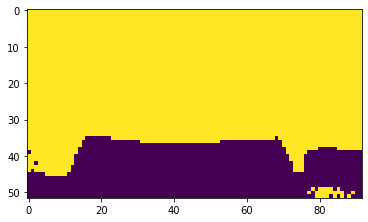

"\nwhile True:\n    \n    check, frame= VideoCap.read()\n    \n\n    cv2.imshow('image', frame)\n    \n\n    if cv2.waitKey(1)&0xFF==ord('q'):\n        VideoCap.release()\n        cv2.destroyAllWindows()\n        break\n"

In [16]:
from grid_map import OccupancyGridMap
import matplotlib.pyplot as plt
import math
import cv2
import numpy as np


VideoCap=cv2.VideoCapture(0)
VideoCap.isOpened()
#print(return_camera_indices())
for i in range(10):
    check, frame= VideoCap.read()
    cv2.imshow('image', frame)

VideoCap.release()

print("frame ligne 2")
print (frame[2,600,:])
print("frame ligne 100")
print (frame[100,600,:])
print("frame ligne 300")
print (frame[300,600,:])
print("frame ligne 500")
print (frame[500,600,:])
print("frame ligne 700")
print (frame[700,600,:])


#cv2.imshow('image', frame)

#print(frame.shape)
#print(len(frame))
#print(len(frame[0]))
nb_square_by_side = 50 # not the exact one
square_pixe_size = math.floor(len(frame)/nb_square_by_side)
print("frame lenght")
print(len(frame))
print("pixel size")
print(square_pixe_size)
min = 80
max = 255
r_tresh = [min, max]
g_tresh = [min, max]
b_tresh = [min, max]
j_pixel_state, i_pixel_state = 0, 0
#print(len(frame))
#print(math.ceil(len(frame[0])/square_pixe_size))

data_j = np.zeros((len(frame),math.ceil(len(frame[0])/square_pixe_size))) 
data_i = np.zeros((math.ceil(len(frame)/square_pixe_size),math.ceil(len(frame[0])/square_pixe_size)))
data_iun = data_i

for i in range(len(frame)):
    for j in range(len(frame[0])):
        r = frame[i,j,0]
        g = frame[i,j,1]
        b = frame[i,j,2]
        
        if(((r >= r_tresh[0]) & (r <= r_tresh[1])) & ((g >= g_tresh[0]) & (g <= g_tresh[1])) & ((b >= b_tresh[0]) & (b <= b_tresh[1]))):
            j_pixel_state = 1
        if (j % square_pixe_size == square_pixe_size-1):
            
            data_j[i,int(((j+1)/square_pixe_size)-1)] = j_pixel_state
            j_pixel_state = 0
        elif ((j == len(frame[0]) - 1)):
            data_j[i,math.ceil((j+1)/square_pixe_size)-1] = j_pixel_state
        
            
print(data_j)

#print(len(data_j[1]))
print("half done")
for j in range(len(data_j[1])):
    for i in range(len(frame)):
        if(data_j[i,j] == 1):
            i_pixel_state = 1
        if (i % square_pixe_size == square_pixe_size-1):
            data_i[int(((i+1)/square_pixe_size)-1),j] = i_pixel_state
            i_pixel_state = 0     
        elif ((i == len(frame) - 1)):
            data_i[(math.ceil((i+1)/square_pixe_size))-1,j] = i_pixel_state   
            

ogm_drid = data_i
print(ogm_drid.shape)
#print(ogm_drid)

#plt.imshow(ogm_drid, vmin=0, vmax=1, origin='lower', interpolation='none', alpha=1)
plt.imshow(ogm_drid)

plt.draw()
plt.show()

cv2.destroyAllWindows()
#somme les pixels
#new_frame = np.sum(frame, axis = 1)
#print(new_frame)


"""
while True:
    
    check, frame= VideoCap.read()
    

    cv2.imshow('image', frame)
    

    if cv2.waitKey(1)&0xFF==ord('q'):
        VideoCap.release()
        cv2.destroyAllWindows()
        break
"""

Test juste camera

In [17]:
import cv2
import numpy as np

VideoCap=cv2.VideoCapture(0)
VideoCap.isOpened()
#i = 0
#print(return_camera_indices())
while True:
    #i = i+1
    check, frame= VideoCap.read()
    

    cv2.imshow('image', frame)
    

    if cv2.waitKey(1)&0xFF==ord('q'):
        VideoCap.release()
        cv2.destroyAllWindows()
        break
    
print(frame)
VideoCap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

TEST POUR LE GRID MAPPPING

In [ ]:
from grid_map import OccupancyGridMap
import matplotlib.pyplot as plt

# load the map
gmap = OccupancyGridMap.from_png('maps/example_map_occupancy.png', 1)
gmap.plot()       

plt.show()


In [3]:
import math 
#print(round(2.1))

print(math.ceil(4.2)) 
print(math.floor(4.2)) 

a = np.zeros((2,2))
print(a)


5
4
[[0. 0.]
 [0. 0.]]
